# Modelo KNN Laboratorio 1

Para la carga y limpieza de datos se basó en el procedimiento ya realizado por el compañero Felipe Bedoya

### Importación de librerias

Se importan las librerias para poder visualizar los datos y utilizar KNN.

In [1]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#para hacer balanceo de los features
from imblearn.over_sampling import SMOTE
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree
from sklearn import preprocessing

### 2. Carga de los datos
Se realiza la carga de los datos en formato csv a través de la librería **pandas**

In [2]:
#Debido a la existencia de valores no numericos debemos incluirlos como NaN. Esto se explica mas adelante
missing_values = ["-", 'Xx', '?']
# Se cargan los datos. 
df_diabetes=pd.read_csv('../Resources/202210_Laboratorio1_data_Datos_Clasificacion_2022.csv', sep=';', encoding = 'utf-8', index_col=0, dtype='unicode', na_values= missing_values)

In [3]:
# Cantidad de datos y número de variables
df_diabetes.shape

(100000, 26)

In [4]:
df_diabetes.isna().sum()

HighBP                      62
HighChol                    34
CholCheck                   46
BMI                         52
Smoker                      67
Stroke                      45
HeartDiseaseorAttack        46
PhysActivity                48
Fruits                      57
Veggies                     51
HvyAlcoholConsump           36
AnyHealthcare               44
NoDocbcCost                 54
GenHlth                     42
MentHlth                    46
PhysHlth                    67
DiffWalk                    48
Sex                         48
Age                         56
Education                   57
Income                      18
Unnamed: 22             100000
Unnamed: 23             100000
Unnamed: 24             100000
Unnamed: 25             100000
Unnamed: 26             100000
dtype: int64

In [5]:
# Mostrar los datos
df_diabetes.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
Diabetes_012,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,40,1,0,0,0,0,1,0,1,...,18,15,1,0,9,4,3,NaN,NaN,NaN,NaN,NaN
0.0,0,0,0,25,1,0,0,1,0,0,0,0,...,0,0,0,0,7,6,1,NaN,NaN,NaN,NaN,NaN
0.0,1,1,1,28,0,0,0,0,1,0,0,1,...,30,30,1,0,9,4,8,NaN,NaN,NaN,NaN,NaN
0.0,1,0,1,27,0,0,0,1,1,1,0,1,...,0,0,0,0,11,3,6,NaN,NaN,NaN,NaN,NaN
0.0,1,1,1,24,0,0,0,1,1,1,0,1,...,3,0,0,0,11,5,4,NaN,NaN,NaN,NaN,NaN


In [6]:
# Podemos ver los tipos de todas la variables.
df_diabetes.dtypes

HighBP                  object
HighChol                object
CholCheck               object
BMI                     object
Smoker                  object
Stroke                  object
HeartDiseaseorAttack    object
PhysActivity            object
Fruits                  object
Veggies                 object
HvyAlcoholConsump       object
AnyHealthcare           object
NoDocbcCost             object
GenHlth                 object
MentHlth                object
PhysHlth                object
DiffWalk                object
Sex                     object
Age                     object
Education               object
Income                  object
Unnamed: 22             object
Unnamed: 23             object
Unnamed: 24             object
Unnamed: 25             object
Unnamed: 26             object
dtype: object

In [7]:
# Y hacer una descripción de los datos
df_diabetes.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,99938,99966,99954,99948,99933,99955,99954,99952,99943,99949,99964,99956,...,99954,99933,99952,99952,99944,99943,99982,0,0,0,0,0
unique,2,2,2,92,2,2,2,2,2,2,2,2,...,46,51,2,2,13,6,8,0,0,0,0,0
top,0,0,1,27,0,0,0,1,1,1,0,1,...,0,0,0,0,9,6,8,NaN,NaN,NaN,NaN,NaN
freq,56544,56814,96330,9624,55426,95818,90617,76135,63639,81464,94248,95003,...,68495,62518,83320,56163,13114,43815,36920,NaN,NaN,NaN,NaN,NaN


In [8]:
# Se observa que hay ausencias, en particular en la variable "decibel_range". Veamos cuantas, para todas las variables:
df_diabetes.isnull().sum()

HighBP                      62
HighChol                    34
CholCheck                   46
BMI                         52
Smoker                      67
Stroke                      45
HeartDiseaseorAttack        46
PhysActivity                48
Fruits                      57
Veggies                     51
HvyAlcoholConsump           36
AnyHealthcare               44
NoDocbcCost                 54
GenHlth                     42
MentHlth                    46
PhysHlth                    67
DiffWalk                    48
Sex                         48
Age                         56
Education                   57
Income                      18
Unnamed: 22             100000
Unnamed: 23             100000
Unnamed: 24             100000
Unnamed: 25             100000
Unnamed: 26             100000
dtype: int64

### 3. Limpieza y Preparación de los datos

Primero se van a eliminar las 5 últimas columnas, ya que estan vacías y pueden alterar el análisis a realizar

In [9]:
df_diabetes = df_diabetes.iloc[:,:-5]
df_diabetes

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
0.0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
0.0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
0.0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
0.0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0,1,1,1,19,1,0,0,1,0,0,0,1,0,3,0,4,0,0,11,5,5
0.0,1,1,1,25,1,0,1,1,1,1,0,1,0,2,0,10,1,0,13,4,5
0.0,0,1,1,29,1,0,0,1,0,1,0,1,0,2,0,0,0,0,8,4,8


Para que el tipo de datos de la tabla sea numerico, es necesario eliminar las tuplas con valores inválidos, pero antes es importante analizar si es posible eliminar estas tuplas sin alterar el análisis

<AxesSubplot:ylabel='Diabetes_012'>

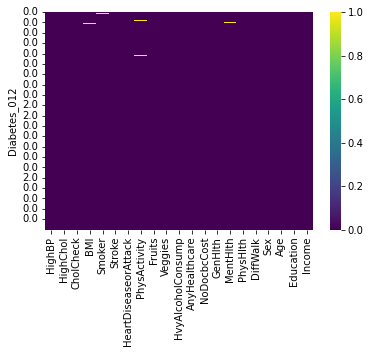

In [10]:
sns.heatmap(df_diabetes.isna(), cmap='viridis')

In [11]:
#Se procede a eliminar estas tuplas
df_diabetes = df_diabetes.dropna()

In [12]:
df_diabetes = df_diabetes.astype(int)
df_diabetes.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000
mean,0.434204,0.431810,0.963713,28.319847,0.445387,0.041338,0.093284,0.761911,0.636794,0.815099,0.057118,0.950479,0.081838,2.503061,3.145068,4.197741,0.166263,0.438285,8.093304,5.077413,6.104063
std,0.495655,0.495331,0.187005,7.694655,0.497011,0.199073,0.290832,0.425916,0.480926,0.388219,0.232069,0.216955,0.274119,1.069168,7.555697,8.932690,0.372318,0.496179,3.043348,0.984621,2.060519
min,0.000000,0.000000,0.000000,-35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-37.000000,-43.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,36.000000,42.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [13]:
# Podemos ver los tipos de todas la variables.
df_diabetes.dtypes

HighBP                  int32
HighChol                int32
CholCheck               int32
BMI                     int32
Smoker                  int32
Stroke                  int32
HeartDiseaseorAttack    int32
PhysActivity            int32
Fruits                  int32
Veggies                 int32
HvyAlcoholConsump       int32
AnyHealthcare           int32
NoDocbcCost             int32
GenHlth                 int32
MentHlth                int32
PhysHlth                int32
DiffWalk                int32
Sex                     int32
Age                     int32
Education               int32
Income                  int32
dtype: object

In [14]:
df_diabetes['IsDiabetic'] = df_diabetes.index
#Incluimos una de las particiones de los datos de una vez para evitar que se altere
df_diabetes = df_diabetes.dropna()
df_diabetes.reset_index(drop=True, inplace=True)
df_diabetes.sample(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,IsDiabetic
50992,0,0,1,52,1,0,0,1,0,1,1,1,0,2,0,1,0,1,2,5,5,0.0
72010,1,1,1,28,0,0,0,1,0,0,0,1,1,4,0,30,1,0,11,4,2,0.0
9189,0,1,1,23,1,0,0,1,1,1,0,1,0,2,1,0,0,0,8,5,8,0.0
81467,0,0,1,29,0,0,0,0,0,0,0,1,0,2,0,3,1,0,2,6,8,0.0
48827,1,0,1,29,1,1,0,1,1,1,0,1,0,3,0,0,1,0,9,4,3,2.0


In [15]:
Y = df_diabetes['IsDiabetic']
Y.sample(5)

54876    2.0
76680    0.0
22599    2.0
39176    2.0
4659     0.0
Name: IsDiabetic, dtype: float64

Ahora se estandarizan los datos

In [16]:
df_diabetes_pru = df_diabetes.copy()
normalized_df=(df_diabetes_pru-df_diabetes_pru.min())/(df_diabetes_pru.max()-df_diabetes_pru.min())
normalized_df
df_diabetes = normalized_df
df_diabetes

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,IsDiabetic
0,1.0,1.0,1.0,0.563910,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.00,0.753425,0.682353,1.0,0.0,0.666667,0.6,0.285714,0.0
1,0.0,0.0,0.0,0.451128,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.50,0.506849,0.505882,0.0,0.0,0.500000,1.0,0.000000,0.0
2,1.0,1.0,1.0,0.473684,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.00,0.917808,0.858824,1.0,0.0,0.666667,0.6,1.000000,0.0
3,1.0,0.0,1.0,0.466165,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.25,0.506849,0.505882,0.0,0.0,0.833333,0.4,0.714286,0.0
4,1.0,1.0,1.0,0.443609,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.25,0.547945,0.505882,0.0,0.0,0.833333,0.8,0.428571,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98928,1.0,1.0,1.0,0.406015,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.50,0.506849,0.552941,0.0,0.0,0.833333,0.8,0.571429,0.0
98929,1.0,1.0,1.0,0.451128,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.25,0.506849,0.623529,1.0,0.0,1.000000,0.6,0.571429,0.0
98930,0.0,1.0,1.0,0.481203,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.25,0.506849,0.505882,0.0,0.0,0.583333,0.6,1.000000,0.0
98931,1.0,1.0,1.0,0.443609,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00,0.506849,0.505882,0.0,0.0,0.916667,0.4,0.285714,0.0


Luego se analiza el balanceo de datos

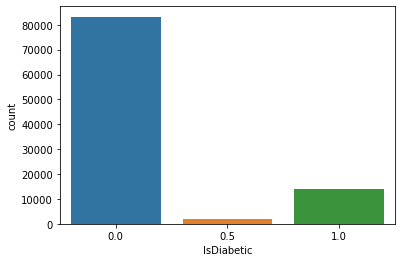

In [17]:
ax = sns.countplot(x='IsDiabetic', data=df_diabetes)

Se va a utilizar SMOTE para balancear los datos y obtener un modelo más apropiado

In [18]:
diabCol = df_diabetes


In [19]:
df_diabetes = df_diabetes.drop(['IsDiabetic'], axis=1)


In [20]:
# transform the dataset
oversample = SMOTE()


In [21]:
df_diabetes, Y = oversample.fit_resample(df_diabetes, Y)


In [22]:
df_diabetes['Diabetes_012'] = Y


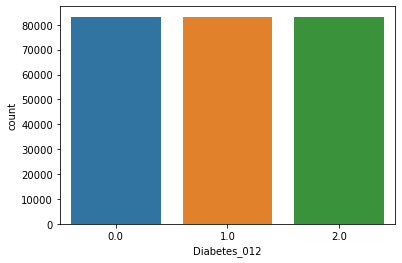

In [23]:
ax = sns.countplot(x='Diabetes_012', data=df_diabetes)


In [24]:
df_diabetes = df_diabetes.drop(['Diabetes_012'], axis=1)

Finalmente utilizamos el metodo de filtro de Pearson para ver las etiquetas mas importantes.

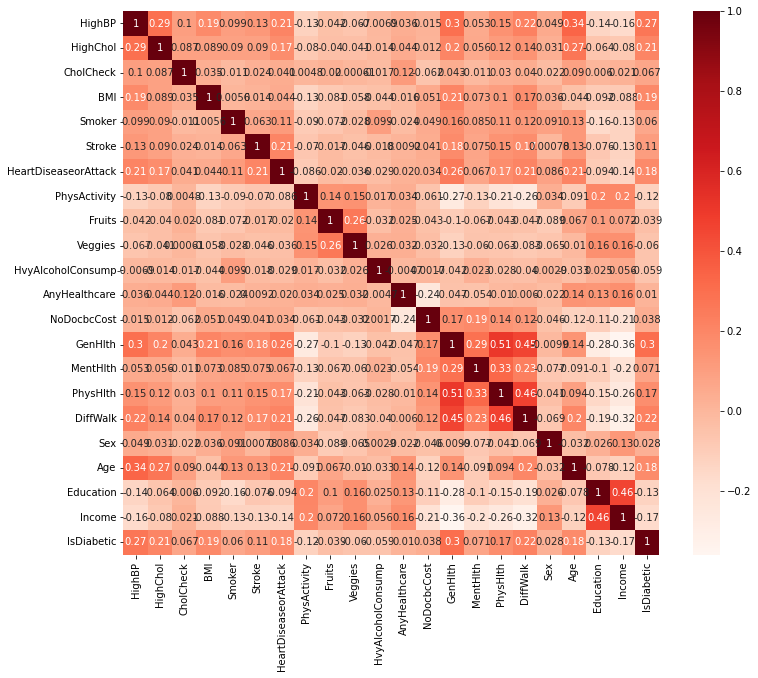

In [25]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = diabCol.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [26]:
#Correlation with output variable
cor_target = abs(cor["IsDiabetic"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features = relevant_features.iloc[:-1]
print(relevant_features)

HighBP                  0.271408
HighChol                0.207294
BMI                     0.190217
Stroke                  0.106665
HeartDiseaseorAttack    0.182025
PhysActivity            0.121123
GenHlth                 0.299764
PhysHlth                0.169162
DiffWalk                0.222965
Age                     0.178475
Education               0.129937
Income                  0.166849
Name: IsDiabetic, dtype: float64


Ahora se procede a dejar solamente estas columnas en el DataFrame. Con esto nos aseguramos que el modelo se mantenga enfocado en las relaciones de etiquetas importantes.

In [27]:
df_diabetes = df_diabetes[relevant_features.index]
df_diabetes.sample(5)

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
80810,1.0,0.0,0.428571,0.0,0.0,1.0,0.500000,0.505882,0.0,0.833333,1.0,0.142857
1321,0.0,1.0,0.443609,0.0,0.0,1.0,0.250000,0.505882,0.0,0.500000,1.0,1.000000
167067,1.0,0.0,0.469170,0.0,0.0,1.0,0.119982,0.505882,0.0,0.569953,1.0,0.645724
104140,1.0,0.0,0.458019,0.0,0.0,1.0,0.250000,0.505882,0.0,0.819414,1.0,0.845212
240752,1.0,0.0,0.528453,0.0,0.0,1.0,0.250000,0.505882,0.0,0.833333,1.0,0.969363


### 4. Entrenamiento del modelo KNN

In [28]:
#Se asigna a X los features seleccionados
X = df_diabetes

In [29]:
Y.sample(5)

142002    1.0
158162    1.0
202047    2.0
137510    1.0
217918    2.0
Name: IsDiabetic, dtype: float64

In [30]:
# Dividimos el conjunto de entrenamiento en dos: una para la construcción del modelo (sería el nuevo conjunto de 
# entrenamiento) y otro para la validación, el cuál será utilizado para determinar el rendimiento del modelo con una
# combinación específica de hiperparámetros.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 98572398)

In [31]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [32]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'n_neighbors':[16,18,20,22],'p':[1]}

In [33]:
knn = KNeighborsClassifier(metric='minkowski')
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(knn, param_grid, cv=particiones)
#lab_enc = preprocessing.LabelEncoder()
#training_scores_encoded = lab_enc.fit_transform(Y_train)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [16, 18, 20, 22], 'p': [1]})

In [34]:
mejor_modelo.best_params_

{'n_neighbors': 16, 'p': 1}

In [35]:
# Obtener el mejor modelo.
arbol_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.81
Exactitud sobre test: 0.78


In [36]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77     12575
         1.0       0.82      0.87      0.84     12497
         2.0       0.76      0.68      0.72     12384

    accuracy                           0.78     37456
   macro avg       0.78      0.78      0.78     37456
weighted avg       0.78      0.78      0.78     37456



In [37]:
# Por ejemplo, tomemos un dato del conjunto de test y apliquemos el método "predict_proba".
y_pred_test = arbol_final.predict_proba(X_test.iloc[[105]])

In [38]:
print(y_pred_test)

[[0.     0.8125 0.1875]]


In [39]:
# Para saber el orden de las clases puedes utilizar el atributo "classes_" del modelo:
arbol_final.classes_

array([0., 1., 2.])